<a href="https://colab.research.google.com/github/EfrenOlivasITD/PyE/blob/main/PFINALRegrLinYCorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probabilidad y estadistica**

# Unidad 5. Regresión y Correlación

Practica Final

Facilitador: Dr. Jose Gabriel Rodriguez Rivas

Alumno: Efren de Jesus Olivas Gomez

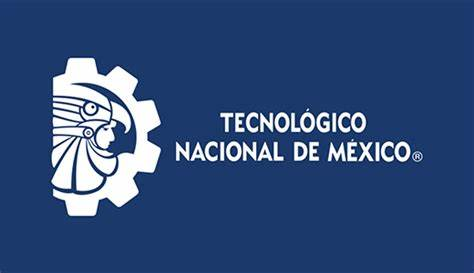

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Cargar los datos
df1 = pd.read_csv("grupo1.csv")
df2 = pd.read_csv("grupo2.csv")
df3 = pd.read_csv("grupo3.csv")

In [22]:
# Función para analizar cada grupo
def analizar_grupo(df, nombre_grupo):
    print(f"\n📊 **Análisis del {nombre_grupo}**")

    # Exploración Inicial de Datos
    print("\n📌 Exploración inicial:")
    print(df.describe())  # Descripción estadística

    # Histograma de calificaciones
    plt.figure(figsize=(6, 4))
    plt.hist(df["Calificacion"], bins=10, alpha=0.7, color='purple', edgecolor='black')
    plt.xlabel("Calificación Final")
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de Calificaciones - {nombre_grupo}")
    plt.grid(True)
    plt.show()

    # Extraer variables para regresión
    horas_estudio = np.array(df["HorasEstudio"]).reshape(-1, 1)
    calificacion = np.array(df["Calificacion"])

    # Crear y entrenar el modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(horas_estudio, calificacion)

    # Obtener coeficientes
    pendiente = modelo.coef_[0]
    intercepto = modelo.intercept_

    # Calcular coeficiente de correlación de Pearson
    correlacion, p_valor = pearsonr(df["HorasEstudio"], df["Calificacion"])

    # Calcular coeficiente de determinación (R²)
    r2 = modelo.score(horas_estudio, calificacion)

    # Evaluación de significancia estadística usando Statsmodels
    horas_estudio_sm = sm.add_constant(horas_estudio)
    modelo_stats = sm.OLS(calificacion, horas_estudio_sm).fit()
    significancia = modelo_stats.pvalues[1]  # p-valor de la pendiente

    # Predicción para 8 horas de estudio
    prediccion_horas = np.array([[8]])
    calificacion_predicha = modelo.predict(prediccion_horas)

    # Mostrar resultados
    print(f"\n📈 **Resultados del modelo de regresión:**")
    print(f"▪️ Pendiente: {pendiente:.2f}")
    print(f"▪️ Intercepto: {intercepto:.2f}")
    print(f"▪️ Coeficiente de Correlación (Pearson): {correlacion:.2f} (p-valor: {p_valor:.4f})")
    print(f"▪️ Coeficiente de Determinación (R²): {r2:.2f}")
    print(f"▪️ Significancia estadística del modelo (p-valor): {significancia:.4f}")
    print(f"🔮 Calificación esperada para 8 horas de estudio: {calificacion_predicha[0]:.2f}\n")

    # Graficar la regresión
    plt.figure(figsize=(6, 5))
    sns.regplot(x=df["HorasEstudio"], y=df["Calificacion"], scatter=True, color='blue')

    # Agregar la predicción al gráfico
    plt.scatter(prediccion_horas, calificacion_predicha, color='green', marker='x', s=100,
                label=f'Predicción (8, {calificacion_predicha[0]:.2f})')

    plt.title(f'Diagrama de Dispersión - {nombre_grupo}')
    plt.xlabel('Horas de Estudio')
    plt.ylabel('Calificación Final')
    plt.legend()
    plt.grid(True)
    plt.show()


📊 **Análisis del Grupo 1**

📌 Exploración inicial:
       HorasEstudio  Calificacion
count     50.000000      50.00000
mean      14.352000      83.78820
std        4.219174       7.83389
min        3.790000      68.46000
25%       12.032500      78.03500
50%       14.600000      84.49000
75%       17.715000      88.09000
max       20.000000     100.00000


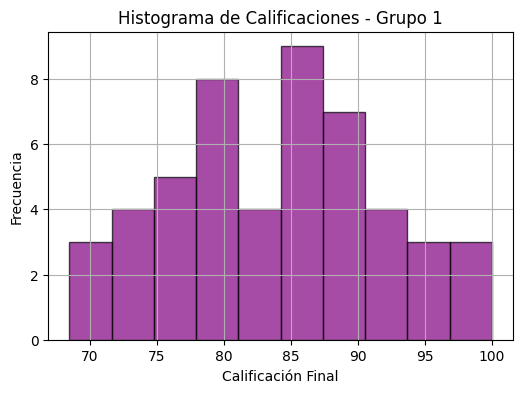


📈 **Resultados del modelo de regresión:**
▪️ Pendiente: -0.11
▪️ Intercepto: 85.31
▪️ Coeficiente de Correlación (Pearson): -0.06 (p-valor: 0.6935)
▪️ Coeficiente de Determinación (R²): 0.00
▪️ Significancia estadística del modelo (p-valor): 0.6935
🔮 Calificación esperada para 8 horas de estudio: 84.46



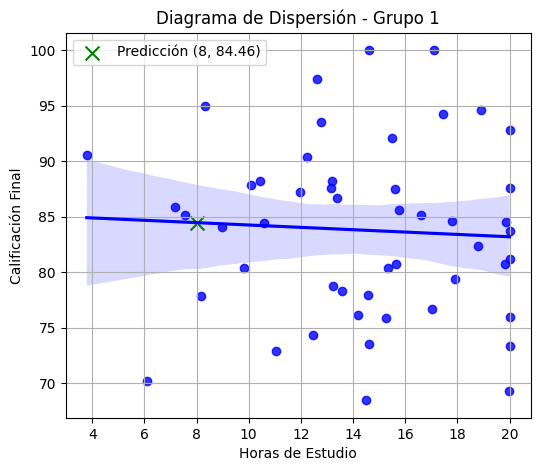


📊 **Análisis del Grupo 2**

📌 Exploración inicial:
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.912000
std        4.219174     20.668922
min        3.790000     26.100000
25%       12.032500     63.500000
50%       14.600000     78.550000
75%       17.715000     93.300000
max       20.000000     99.000000


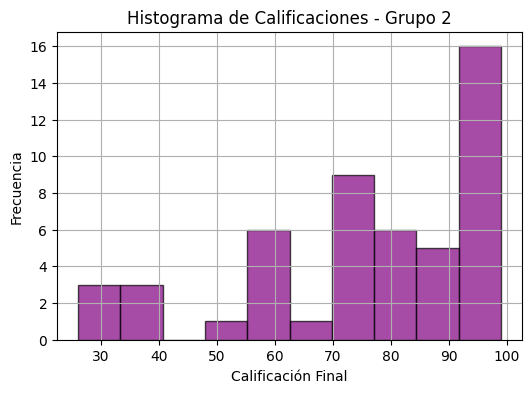


📈 **Resultados del modelo de regresión:**
▪️ Pendiente: 4.22
▪️ Intercepto: 15.31
▪️ Coeficiente de Correlación (Pearson): 0.86 (p-valor: 0.0000)
▪️ Coeficiente de Determinación (R²): 0.74
▪️ Significancia estadística del modelo (p-valor): 0.0000
🔮 Calificación esperada para 8 horas de estudio: 49.09



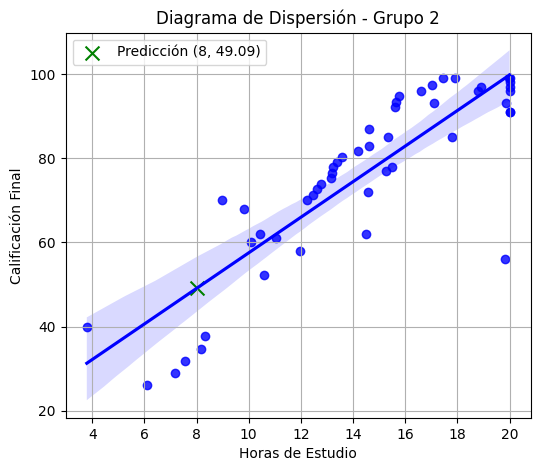


📊 **Análisis del Grupo 3**

📌 Exploración inicial:
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.968000
std        4.219174     23.668867
min        3.790000     15.000000
25%       12.032500     61.000000
50%       14.600000     84.950000
75%       17.715000     94.375000
max       20.000000     99.000000


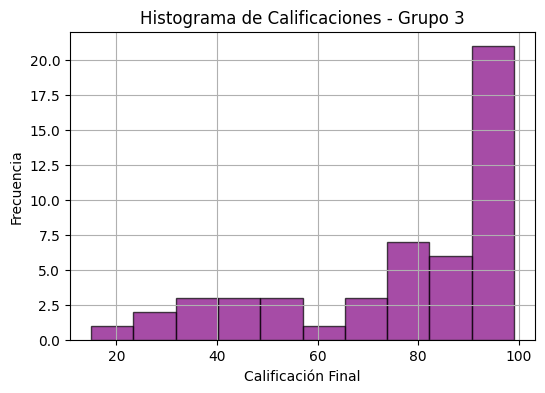


📈 **Resultados del modelo de regresión:**
▪️ Pendiente: 5.29
▪️ Intercepto: 0.11
▪️ Coeficiente de Correlación (Pearson): 0.94 (p-valor: 0.0000)
▪️ Coeficiente de Determinación (R²): 0.89
▪️ Significancia estadística del modelo (p-valor): 0.0000
🔮 Calificación esperada para 8 horas de estudio: 42.39



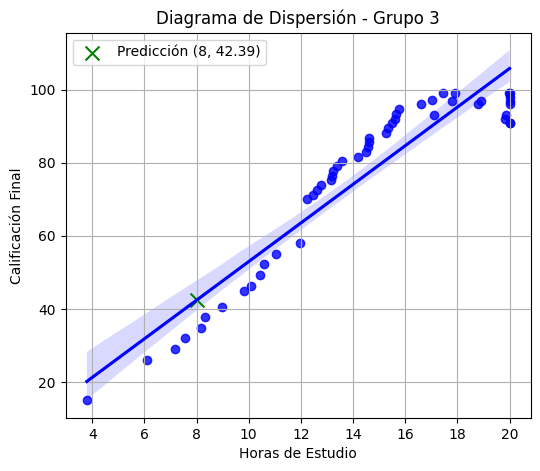

In [23]:
# Aplicar la función a los tres grupos
analizar_grupo(df1, "Grupo 1")
analizar_grupo(df2, "Grupo 2")
analizar_grupo(df3, "Grupo 3")



# 1. ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la
# relación entre el tiempo de estudio y las calificaciones finales?

*   Indica el efecto de una hora adicional de estudio en la calificación final
*   Si la pendiente es positiva, estudiar más tiende a mejorar la calificación

*   Si es negativa, más horas de estudio se relacionan con calificaciones más
bajas


# 2.   ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y
# dirección de la relación entre las variables?

*   Mide la fuerza y dirección de la relación entre estudio y calificación

*   Valores cercanos a +1 indican una relación fuerte y positiva (más estudio, mejor rendimiento).

*   Valores cercanos a 0 indican una relación débil o nula.




# 3.   ¿El modelo de regresión lineal es estadísticamente significativo?


*   Se usa el p-valor de la regresión. Si ( p < 0.05 ), la relación es estadísticamente significativa

*   Un p-valor alto (> 0.05) sugiere que el modelo no tiene una relación confiable entre estudio y calificación


# 4.   ¿Qué tan confiable es el modelo de regresión para predecir las
# calificaciones finales de los estudiantes basado en el tiempo de estudio?


*   Se usa ( R^2 ) (coeficiente de determinación)

*   Valores cercanos a 1 indican que el modelo predice bien las calificaciones basado en horas de estudio.

*   Si es bajo, otros factores además del estudio influyen en las calificaciones






# Conclusiones Generales
El estudio tiene un impacto significativo en el rendimiento académico, pero no es el único factor que determina las calificaciones. Para mejorar el rendimiento de manera efectiva, los estudiantes deben complementar las horas de estudio con estrategias de aprendizaje adecuadas, motivación y hábitos consistentes.